In [1]:
import tensorflow as tf

import pandas as pd
import numpy as np
import scipy as sp

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv(r'data\db1.csv')

In [3]:
df.head(2)['event_datetime']

0    43:32.0
1    43:31.8
Name: event_datetime, dtype: object

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1000.0,5.122290e+02,3.666982e+02,1.000000e+00,2.507500e+02,5.005000e+02,7.502500e+02,5.396000e+03
object_id,1000.0,5.750716e+03,3.361627e+03,3.000000e+01,3.390250e+03,5.108000e+03,8.127750e+03,1.201300e+04
msg_event_time,1000.0,1.755070e+12,4.469897e+05,1.755070e+12,1.755070e+12,1.755070e+12,1.755070e+12,1.755080e+12
ai_timestamp,1000.0,1.755070e+12,4.469897e+05,1.755070e+12,1.755070e+12,1.755070e+12,1.755070e+12,1.755080e+12
faces_count,1000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
face_age_prob,1000.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
face_age_value,1000.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
face_bot_position,1000.0,1.325517e+03,5.444099e+02,5.500000e+01,9.837500e+02,1.232500e+03,1.638250e+03,2.559000e+03
face_detect_confidence,1000.0,6.999090e-01,8.458286e-02,5.085027e-01,6.437824e-01,7.161175e-01,7.703688e-01,8.680212e-01
face_gender_prob,1000.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1000 non-null   int64  
 1   pod_name                1000 non-null   object 
 2   log_timestamp           1000 non-null   object 
 3   log_level               1000 non-null   object 
 4   log_name                1000 non-null   object 
 5   period                  1000 non-null   object 
 6   source_timestamp        1000 non-null   object 
 7   device_id               1000 non-null   object 
 8   object_id               1000 non-null   int64  
 9   event_id                1000 non-null   object 
 10  msg_user_ids            1000 non-null   object 
 11  msg_device_id           1000 non-null   object 
 12  msg_event_id            1000 non-null   object 
 13  msg_video_id            1000 non-null   object 
 14  msg_event_time          1000 non-null   f

In [6]:
cols_one_value = [col for col in df.columns if df[col].nunique() == 1]
print(cols_one_value)

one_value_df = df[cols_one_value]
one_value_df.head(1)

['pod_name', 'log_level', 'log_name', 'msg_user_ids', 'msg_video_id', 'msg_event_type', 'msg_key_base64', 'device_manufacturer', 'faces_count', 'face_age_prob', 'face_age_value', 'face_classification', 'face_gender_prob', 'face_label', 'face_person_id', 'face_similarity', 'face_spoofing', 'face_tag_info', 'created_at', 'updated_at']


,pod_name,log_level,log_name,msg_user_ids,msg_video_id,msg_event_type,msg_key_base64,device_manufacturer,faces_count,face_age_prob,face_age_value,face_classification,face_gender_prob,face_label,face_person_id,face_similarity,face_spoofing,face_tag_info,created_at,updated_at
0,worker-cam-hybrid-0,INFO,actors.cam_hybrid.core.face_recognition_servic...,"[user-001, user-002]",video-001,FACE_RECOGNITION,keybase64-001,"rockchip,rv1126-38x38-v10-emmcrockchip,rv1126",1,0,0,unknown,0,unknown,unknown,0,False,none,46:32.5,46:32.5


In [7]:
df = df.drop([col for col in df.columns
              if df[col].nunique(dropna=True) <= 1], axis=1)

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,1000.0,NaN,NaN,NaN,512.229,366.698184,1.0,250.75,500.5,750.25,5396.0
log_timestamp,1000,948,56:10.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
period,1000,27,20250813_1444,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_timestamp,1000,948,53:38.9,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
device_id,1000,11,67e6113b57b8523d336a807b,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
object_id,1000.0,NaN,NaN,NaN,5750.716,3361.626664,30.0,3390.25,5108.0,8127.75,12013.0
event_id,1000,1000,0fcce7d8-9a53-470a-928c-c1a1cccd25dd,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
msg_device_id,1000,11,67e6113b57b8523d336a807b,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
msg_event_id,1000,1000,0fcce7d8-9a53-470a-928c-c1a1cccd25dd,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
msg_event_time,1000.0,NaN,NaN,NaN,1755070020000.0,446989.70883,1755070000000.0,1755070000000.0,1755070000000.0,1755070000000.0,1755080000000.0


In [9]:
df.head(1)

,id,log_timestamp,period,source_timestamp,device_id,object_id,event_id,msg_device_id,msg_event_id,msg_event_time,...,face_additional_info,face_bot_position,face_detect_confidence,face_iqa_score,face_left_position,face_mask,face_right_position,face_top_position,face_track_id,thumbnail_image
0,1,43:32.0,20250813_1443,43:32.0,67e6113b57b8523d336a80b0,1799,0fcce7d8-9a53-470a-928c-c1a1cccd25dd,67e6113b57b8523d336a80b0,0fcce7d8-9a53-470a-928c-c1a1cccd25dd,1.755070e+12,...,"[0.36111, 0.525905, 0.118182, 0.854831, 0.0590...",1110,0.658249,1.450000e-41,348,False,405,1062,1799,cam_hybrid/c692e4b8eba240b8add9e3e12cf83793


- **Number of Events per Device ID**

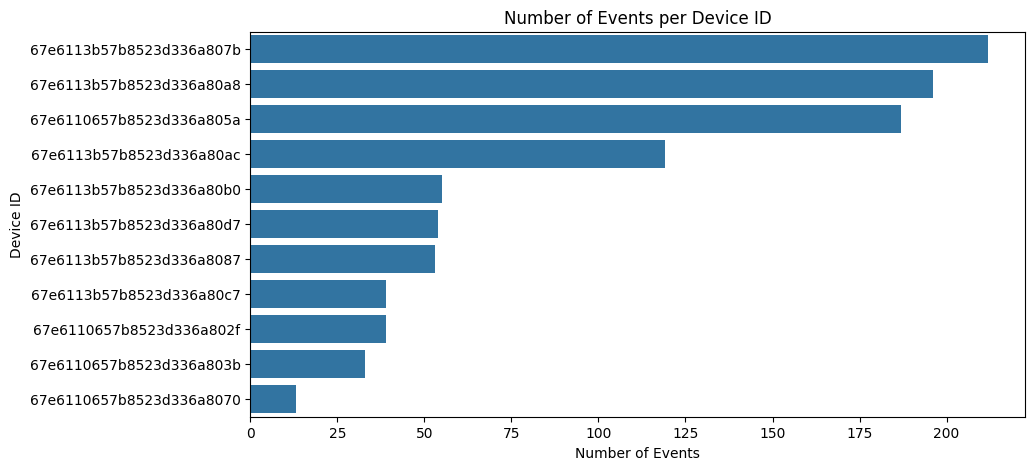

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(y='device_id', data=df, order=df['device_id'].value_counts().index)
plt.title("Number of Events per Device ID")
plt.xlabel("Number of Events")
plt.ylabel("Device ID")
plt.show()

- **Face Detection Confidence**

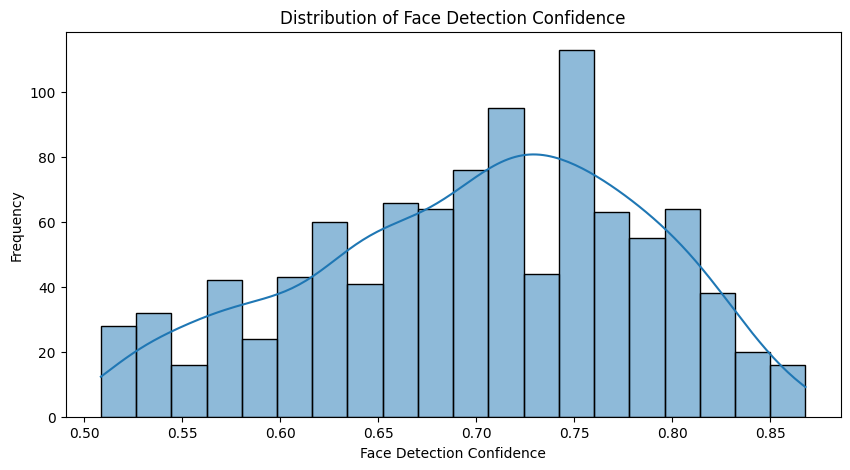

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df['face_detect_confidence'], bins=20, kde=True)
plt.title("Distribution of Face Detection Confidence")
plt.xlabel("Face Detection Confidence")
plt.ylabel("Frequency")
plt.show()

- **Count of Faces with and without Mask**

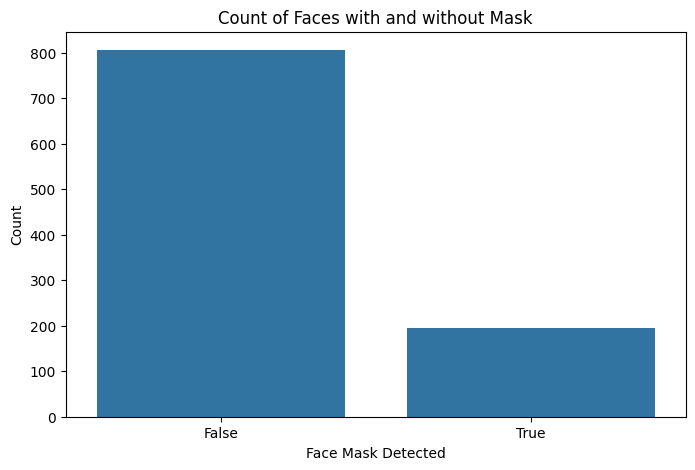

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x="face_mask", data=df)
plt.title("Count of Faces with and without Mask")
plt.xlabel("Face Mask Detected")
plt.ylabel("Count")
plt.show()

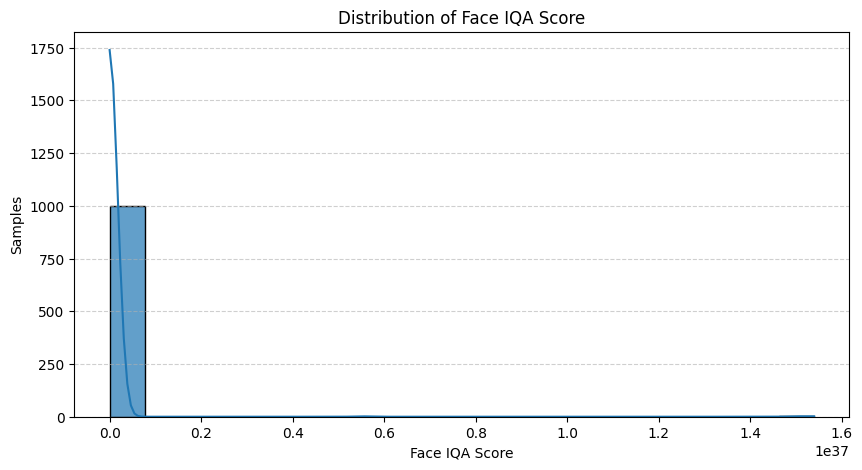

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df['face_iqa_score'], edgecolor="black", alpha=0.7, bins=20, kde=True)
plt.title("Distribution of Face IQA Score")
plt.xlabel("Face IQA Score")
plt.ylabel("Samples")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

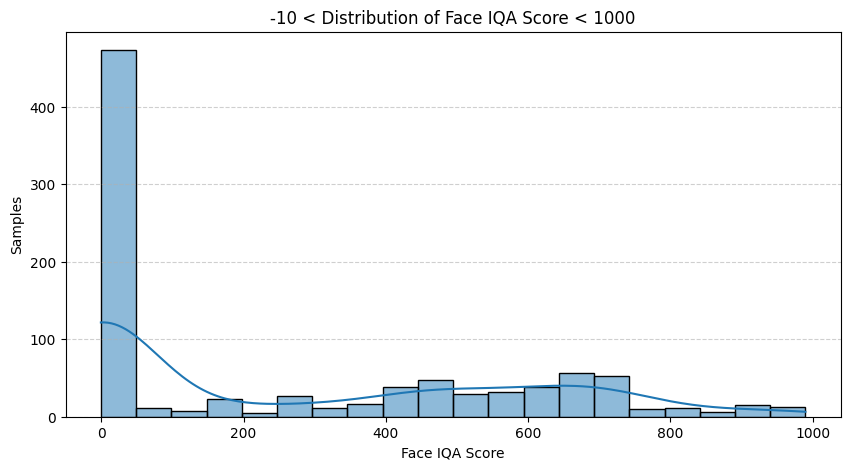

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df[(df['face_iqa_score'] < 1000) & (df['face_iqa_score'] > -10)]['face_iqa_score'], edgecolor="black", bins=20, kde=True)
plt.title("-10 < Distribution of Face IQA Score < 1000")
plt.xlabel("Face IQA Score")
plt.ylabel("Samples")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

In [15]:
df[(df['face_iqa_score'] < 1000) & (df['face_iqa_score'] > 0)]['face_iqa_score'].describe()

count    7.140000e+02
mean     3.400735e+02
std      3.113111e+02
min      4.200000e-45
25%      3.500000e-44
50%      3.826682e+02
75%      6.295004e+02
max      9.897086e+02
Name: face_iqa_score, dtype: float64

In [16]:
a = pd.DataFrame(df['face_iqa_score'].describe())
a

,face_iqa_score
count,1.000000e+03
mean,3.593123e+34
std,7.013856e+35
min,-4.818034e+09
25%,4.200000e-45
50%,1.620581e+02
75%,6.315836e+02
max,1.540000e+37


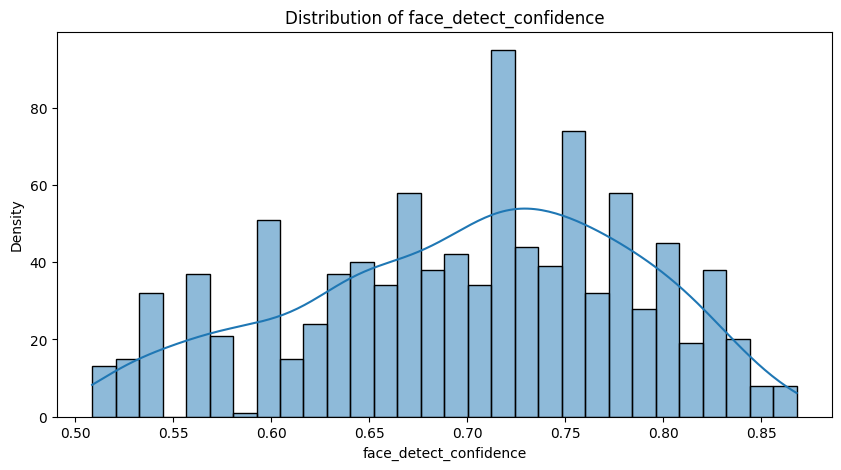

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(df['face_detect_confidence'], bins=30, kde=True)
plt.title("Distribution of face_detect_confidence")
plt.xlabel("face_detect_confidence")
plt.ylabel("Density")
plt.show()

In [18]:
pd.DataFrame(df['face_detect_confidence'].describe())

,face_detect_confidence
count,1000.000000
mean,0.699909
std,0.084583
min,0.508503
25%,0.643782
50%,0.716118
75%,0.770369
max,0.868021


In [19]:
filtered_df = df[df['face_iqa_score'] < 1000].copy()
filtered_df = filtered_df[filtered_df['face_iqa_score'] > -10].copy()
filtered_df['face_iqa_score'].describe()

count    9.220000e+02
mean     2.633530e+02
std      3.086327e+02
min     -4.825745e-01
25%      4.200000e-45
50%      9.914827e-02
75%      5.449061e+02
max      9.897086e+02
Name: face_iqa_score, dtype: float64

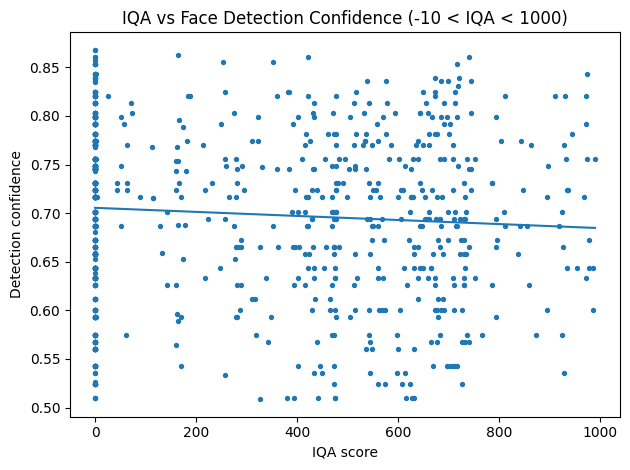

In [20]:
plt.figure()
# plt.scatter(filtered_df['face_iqa_score'], filtered_df['face_detect_confidence'])

x = filtered_df['face_iqa_score'].values
y = filtered_df['face_detect_confidence'].values
a, b = np.polyfit(x, y, 1)
x_line = np.linspace(x.min(), x.max(), 200)
y_line = a * x_line + b

plt.scatter(x, y, s=8)
plt.plot(x_line, y_line)
plt.title("IQA vs Face Detection Confidence (-10 < IQA < 1000)")
plt.xlabel("IQA score")
plt.ylabel("Detection confidence")
plt.tight_layout()
plt.show()

In [21]:
df = df.sort_values("ai_timestamp")

In [22]:
unique_vals = df["ai_timestamp"].value_counts()
print(unique_vals)

ai_timestamp
1.755070e+12    998
1.755080e+12      2
Name: count, dtype: int64


In [23]:
cols = ["event_datetime", "object_id", "face_track_id"]
df_sub = df[cols].copy()

In [24]:
import ast


df['vector'] = df['vector'].apply(lambda x: np.array(ast.literal_eval(x), dtype=float))

In [25]:
import ast
from typing import Iterable, Optional, Tuple, Dict
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.preprocessing import normalize
from sklearn.cluster import DBSCAN



In [26]:
def mean_vector(arrs: pd.Series) -> np.ndarray:
    stacked = np.vstack(arrs.values)  # (n, d)
    return stacked.mean(axis=0)

grouped = df.groupby('face_track_id')['vector'].apply(mean_vector)

In [27]:
grouped

face_track_id
30       [1.19803, -0.711328, 0.187191, 2.05911, -0.374...
32       [0.22463, 0.0374384, 0.0374384, 1.7596, -0.411...
273      [0.187191, -0.374383, 0.748766, 0.262068, -0.1...
275      [-0.16223266666666666, -0.28702700000000003, 0...
278      [0.336945, -0.262068, -0.0374384, -0.299506, -...
                               ...                        
11982    [0.04991746666666667, 0.08735599999999999, 0.0...
11983    [0.28078749999999997, -0.4679785, -1.10443, 0....
12000    [0.673889, -0.7113275, -0.786204, 0.9921145, 0...
12006    [0.2995063333333334, -0.4118213333333334, -0.8...
12013    [1.08571, -0.112315, -0.935957, -0.0748768, -0...
Name: vector, Length: 453, dtype: object

In [28]:
def l2n(X):
    n = np.linalg.norm(X, axis=1, keepdims=True) + 1e-12
    return X / n

def medoid_index(X):
    S = cosine_similarity(X)
    cost = 1.0 - S
    return np.argmin(cost.sum(axis=1))

def outliers_by_medoid(X, abs_thr=0.7, k_std=2.0):
    X = l2n(X)
    c_idx = medoid_index(X)
    center = X[c_idx:c_idx+1, :]
    cos = (X @ center.T).ravel()

    mu, std = cos.mean(), cos.std(ddof=1) if len(cos) > 1 else 0.0
    rel_thr = mu - k_std * std if std > 0 else -1.0
    thr = max(abs_thr, rel_thr)
    flags = cos < thr
    return {"center_idx": int(c_idx), "cos": cos, "flags": flags, "thr": thr}

records = []
summary = []

ABS_THR = 0.5
K_STD = 2.0

for tid, g in df.groupby('face_track_id', sort=False):
    vecs = np.vstack(g['vector'].values)
    res = outliers_by_medoid(vecs, abs_thr=ABS_THR, k_std=K_STD)

    for (idx, cos_i, flag_i) in zip(g.index, res['cos'], res['flags']):
        records.append({
            "index": idx,
            "face_track_id": tid,
            "cos_to_medoid": float(cos_i),
            "is_outlier": bool(flag_i),
            "thr_used": float(res['thr'])
        })

        out_ratio = float(res["flags"].mean())
        summary.append({
            "face_track_id": tid,
            "n_samples": int(len(g)),
            "outliers": int(res["flags"].sum()),
            "outlier_ratio": out_ratio,
            "thr_used": float(res["thr"])
        })

report = pd.DataFrame(records).set_index("index").sort_index()
track_summary = pd.DataFrame(summary).sort_values("outliers", ascending=False)

In [29]:
report

,face_track_id,cos_to_medoid,is_outlier,thr_used
index,,,,
0,1799,0.511366,False,0.5
1,1799,0.642101,False,0.5
2,1799,1.000000,False,0.5
3,5068,0.325512,True,0.5
4,5068,1.000000,False,0.5
...,...,...,...,...
995,11981,1.000000,False,0.5
996,12013,1.000000,False,0.5
997,30,1.000000,False,0.5


In [30]:
type(df['face_track_id'])
type(report['face_track_id'])

pandas.core.series.Series

In [31]:
# Join a few context columns back (time for timeline, etc.)
context_cols = [c for c in ['event_datetime'] if c in df.columns]
report = report.merge(df[['face_track_id'] + context_cols],
                      left_index=True, right_index=True,
                      how="left", suffixes=("", "_df"))

In [32]:
report[report['face_track_id'] == 9792]

,face_track_id,cos_to_medoid,is_outlier,thr_used,face_track_id_df,event_datetime
index,,,,,,
490,9792,1.000000,False,0.5,9792,53:06.8
526,9792,0.269936,True,0.5,9792,52:36.9
529,9792,0.286451,True,0.5,9792,52:36.7
561,9792,0.364542,True,0.5,9792,53:37.0


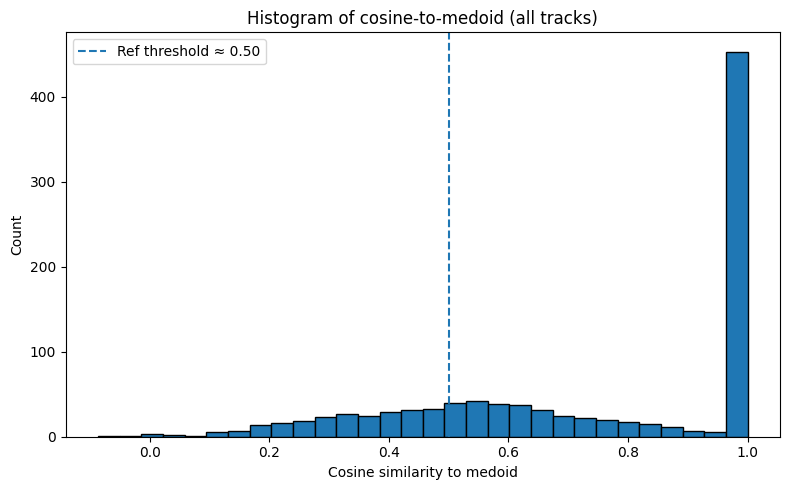

In [33]:
plt.figure(figsize=(8,5))
plt.hist(report["cos_to_medoid"].values, bins=30, edgecolor="black")
# draw a global reference threshold (use median of per-track thr or a fixed)
thr_global = np.median(track_summary["thr_used"])
plt.axvline(thr_global, linestyle="--", label=f"Ref threshold ≈ {thr_global:.2f}")
plt.title("Histogram of cosine-to-medoid (all tracks)")
plt.xlabel("Cosine similarity to medoid")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

In [60]:
unique_tracks = track_summary.drop_duplicates(subset=["face_track_id", "outliers"])
unique_tracks = unique_tracks.sort_values("outliers", ascending=False).head(10)


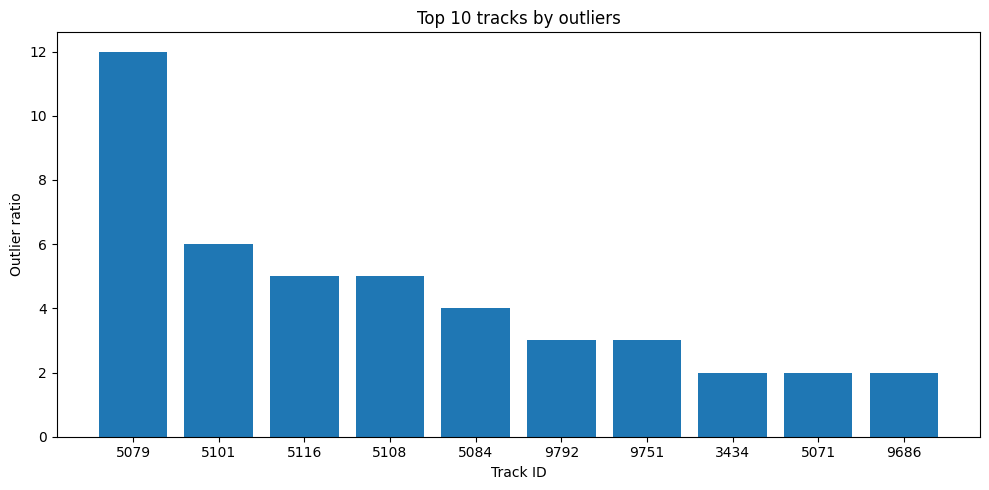

In [63]:
TOP_N = 10
topN = unique_tracks.head(TOP_N)
plt.figure(figsize=(10,5))
plt.bar(topN['face_track_id'].astype(str), topN["outliers"], width=0.8)
# plt.xticks(rotation=45, ha="right")
plt.ylabel("Outlier ratio")
plt.xlabel("Track ID")
plt.title(f"Top {TOP_N} tracks by outliers")
plt.tight_layout()
plt.show()

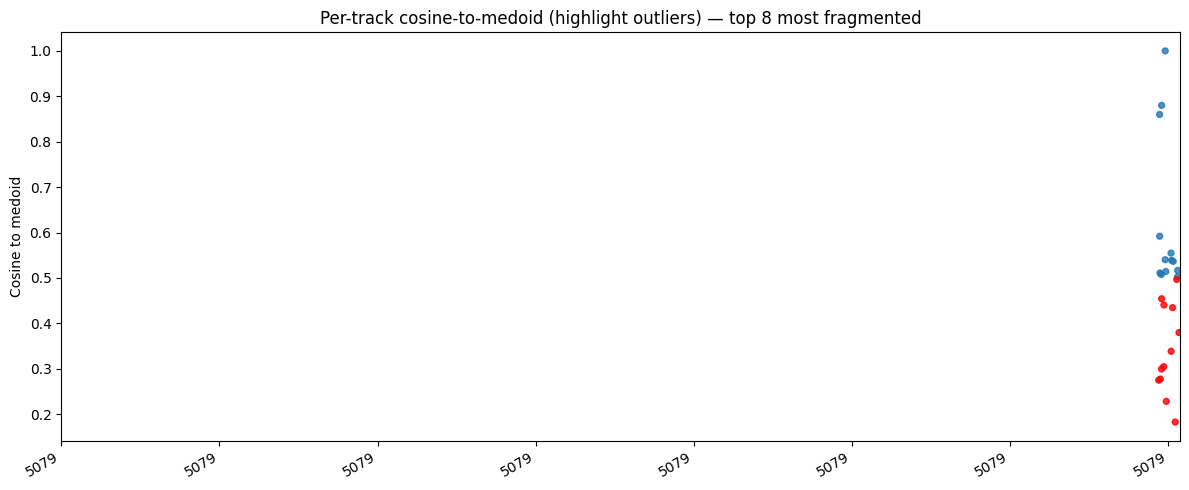

In [36]:
TRACK_COL="face_track_id"

K = 8
sel_tracks = track_summary.head(K)[TRACK_COL].tolist()
sub = report[report[TRACK_COL].isin(sel_tracks)]

plt.figure(figsize=(12,5))
# simple jittered strip with matplotlib
x_map = {tid:i for i, tid in enumerate(sel_tracks)}
xs = np.array([x_map[t] for t in sub[TRACK_COL]])
ys = sub["cos_to_medoid"].values
colors = np.where(sub["is_outlier"].values, "red", "C0")
plt.scatter(xs + (np.random.rand(len(xs)) - 0.5)*0.15, ys, s=18, alpha=0.8, c=colors)
plt.xticks(range(len(sel_tracks)), [str(t) for t in sel_tracks], rotation=30, ha="right")
plt.ylabel("Cosine to medoid")
plt.title(f"Per-track cosine-to-medoid (highlight outliers) — top {K} most fragmented")
plt.tight_layout()
plt.show()

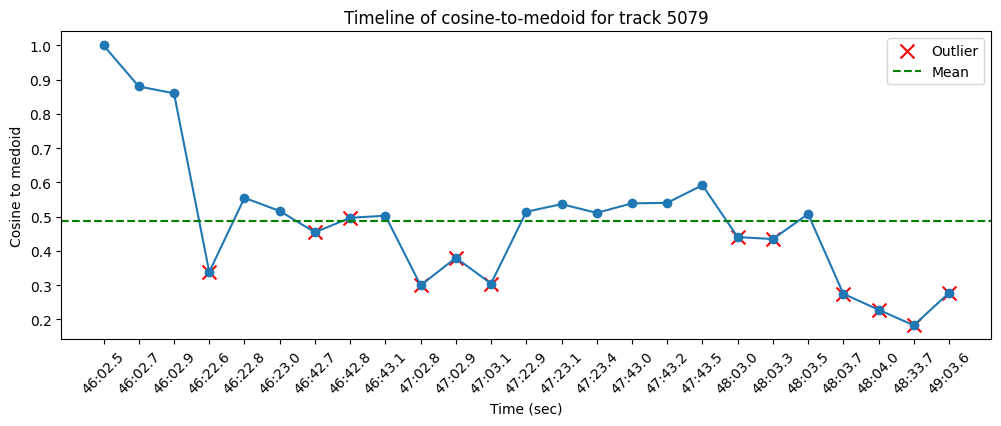

In [37]:
TRACK_ID = 5079

track_sample = report[report['face_track_id']==TRACK_ID].sort_values("event_datetime")
plt.figure(figsize=(12,4))
plt.plot(track_sample['event_datetime'], track_sample['cos_to_medoid'], marker='o')
out = track_sample[track_sample['is_outlier']]
plt.scatter(out['event_datetime'], out['cos_to_medoid'], color='red', marker='x', s=100, label='Outlier')
plt.axhline(y=track_sample['cos_to_medoid'].mean(), color='green', linestyle='--', label='Mean')
plt.title(f"Timeline of cosine-to-medoid for track {TRACK_ID}")
plt.xticks(rotation=45)
plt.xlabel("Time (sec)")
plt.ylabel("Cosine to medoid")
plt.legend()
plt.show()


In [38]:
df['face_track_id'].value_counts()

face_track_id
5079    25
5101    16
5116    15
5085     9
5084     9
        ..
9800     1
9802     1
7408     1
7416     1
30       1
Name: count, Length: 453, dtype: int64

In [39]:
VECTOR_COL = "vector"         
TRACK_COL = "face_track_id"  
COS_SIM_THRESHOLD = 0.40

def track_has_large_diff(group, threshold=COS_SIM_THRESHOLD):
    """
    Return True if the track contains at least one pair of embeddings with cosine similarity
    below the given threshold (i.e., embeddings differ a lot within the same track).
    """
    emb = np.vstack(group["vector"].values)         # shape: (n_frames, d)
    if emb.shape[0] < 2:
        return False                                    # a single vector cannot show internal difference
    sim = cosine_similarity(emb)                        # pairwise cosine similarity
    np.fill_diagonal(sim, 1.0)
    min_sim = sim.min()
    return min_sim < threshold

flags = df.groupby(TRACK_COL).apply(track_has_large_diff)
num_flagged = int(flags.sum())
num_tracks = int(flags.shape[0])

print(f"Total tracks: {num_tracks}")
print(f"Tracks with large internal embedding difference (cosine < {COS_SIM_THRESHOLD}): {num_flagged}")
print(f"Ratio: {num_flagged / num_tracks:.2%}")

# Optional: list flagged track IDs
flagged_ids = flags[flags].index.tolist()
print("Flagged track IDs:", flagged_ids[:20], ("..." if len(flagged_ids) > 20 else ""))

# Optional: compute min cosine similarity per track for inspection
min_cosine_per_track = (
    df.groupby(TRACK_COL)["vector"]
      .apply(lambda s: (lambda m: (np.fill_diagonal(m, 1.0), m.min())[1])(cosine_similarity(np.vstack(s.values))))
      .rename("min_cosine")
      .to_frame()
)
print(min_cosine_per_track.head())
flagged = min_cosine_per_track[min_cosine_per_track < COS_SIM_THRESHOLD]

Total tracks: 453
Tracks with large internal embedding difference (cosine < 0.4): 133
Ratio: 29.36%
Flagged track IDs: [275, 311, 526, 530, 532, 537, 562, 1008, 1009, 1011, 1015, 1023, 1024, 1029, 1031, 1035, 1743, 1745, 1746, 1750] ...
               min_cosine
face_track_id            
30               1.000000
32               1.000000
273              1.000000
275              0.373302
278              1.000000


C:\Users\Hiep\AppData\Local\Temp\ipykernel_11736\633390131.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  flags = df.groupby(TRACK_COL).apply(track_has_large_diff)


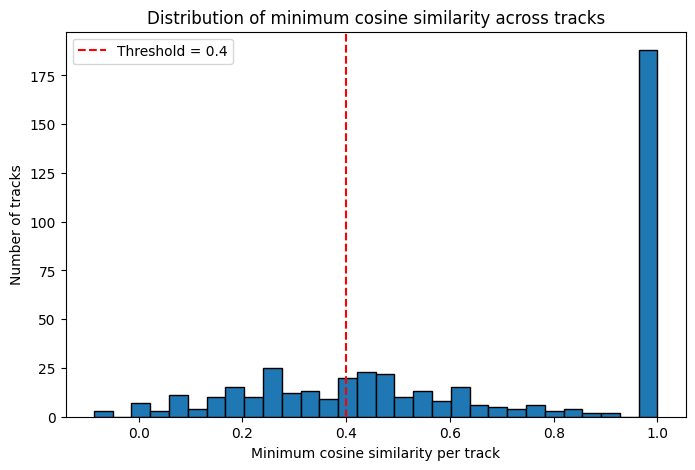

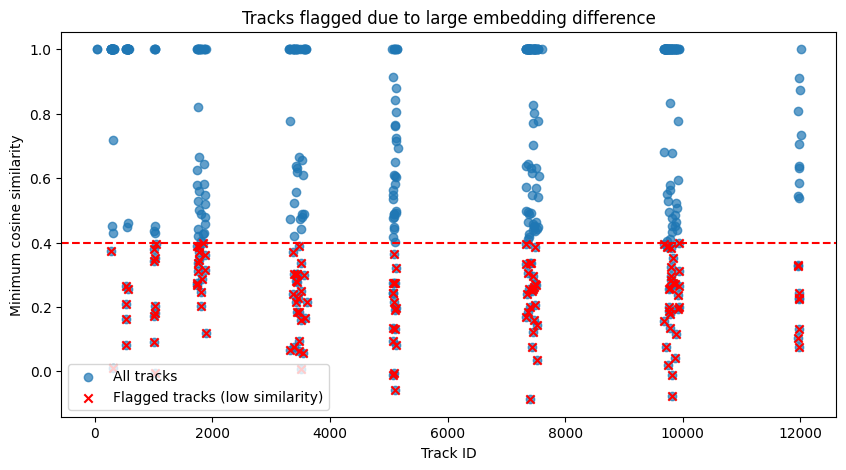

In [40]:
# --- Visualization 1: Histogram of min cosine similarities ---
plt.figure(figsize=(8,5))
plt.hist(min_cosine_per_track, bins=30, edgecolor="black")
plt.axvline(COS_SIM_THRESHOLD, color="red", linestyle="--", label=f"Threshold = {COS_SIM_THRESHOLD}")
plt.xlabel("Minimum cosine similarity per track")
plt.ylabel("Number of tracks")
plt.title("Distribution of minimum cosine similarity across tracks")
plt.legend()
plt.show()

# --- Visualization 2: Highlight flagged tracks ---
plt.figure(figsize=(10,5))
plt.scatter(min_cosine_per_track.index, min_cosine_per_track, marker='o', alpha=0.7, label="All tracks")
plt.scatter(flagged.index, flagged, marker='x', color="red", label="Flagged tracks (low similarity)")
plt.axhline(COS_SIM_THRESHOLD, color="red", linestyle="--")
plt.xlabel("Track ID")
plt.ylabel("Minimum cosine similarity")
plt.title("Tracks flagged due to large embedding difference")
plt.legend()
plt.show()

In [41]:
df['event_datetime'].value_counts()

event_datetime
56:10.0    3
48:36.2    3
44:51.5    2
56:15.5    2
54:52.8    2
          ..
00:52.7    1
00:35.4    1
00:35.2    1
00:35.0    1
12:42.1    1
Name: count, Length: 941, dtype: int64

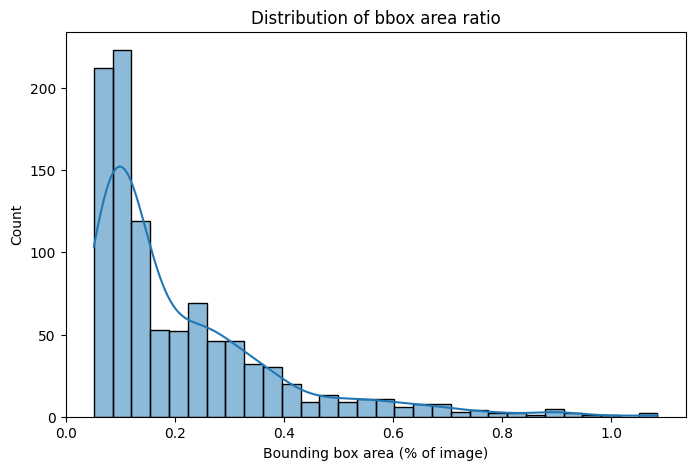

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

IMAGE_W = 2560
IMAGE_H = 1440
L = "face_left_position"
T = "face_top_position"
R = "face_right_position"
B = "face_bot_position"


w = (df[R] - df[L])
h = (df[B] - df[T])

img_area = float(IMAGE_W) * float(IMAGE_H)
bbox_area_px = w * h
bbox_area_pct = (bbox_area_px * 100.0 / img_area) 


df["bbox_area_px"] = bbox_area_px
df["bbox_area_pct"] = bbox_area_pct

# print(df[["face_track_id", L, T, R, B, "bbox_area_px", "bbox_area_pct"]].head())

plt.figure(figsize=(8,5))
sns.histplot(df["bbox_area_pct"], bins=30, edgecolor="black", kde=True)
plt.xlabel("Bounding box area (% of image)")
plt.ylabel("Count")
plt.title("Distribution of bbox area ratio")
plt.show()

In [43]:
a = df.iloc[2][["bbox_area_pct", L, R, T, B]]
a

bbox_area_pct          0.652317
face_left_position         1266
face_right_position        1439
face_top_position           146
face_bot_position           285
Name: 659, dtype: object

In [44]:
def show_bounding_box(l, t, r, b, pct, axe, text=None, color="red"):
    w, h = r - l, b - t
    rect = Rectangle((l, t), w, h, fill=False, edgecolor=color, linewidth=1)
    axe.add_patch(rect)
    axe.text(l, t-5, f"{text} {pct:.2f}%", color=color, fontsize=8)


In [45]:
df.iloc[1][[L]]

face_left_position    1000
Name: 658, dtype: object

In [46]:
df_max_ratio = df.nlargest(5, 'bbox_area_pct')
df_min_ratio = df.nsmallest(5, 'bbox_area_pct')
df_visual = pd.concat([df_min_ratio, df_max_ratio], ignore_index=True)

df_visual

,id,log_timestamp,period,source_timestamp,device_id,object_id,event_id,msg_device_id,msg_event_id,msg_event_time,...,face_detect_confidence,face_iqa_score,face_left_position,face_mask,face_right_position,face_top_position,face_track_id,thumbnail_image,bbox_area_px,bbox_area_pct
0,501,52:58.2,20250813_1452,52:58.2,67e6113b57b8523d336a80a8,9751,b3ca8ea9-d1ee-4904-a924-546e5d806214,67e6113b57b8523d336a80a8,b3ca8ea9-d1ee-4904-a924-546e5d806214,1.755070e+12,...,0.643782,4.222333e+02,325,True,377,1418,9751,cam_hybrid/740789e5baa34db8bdbbd9d569599c50,1872,0.050781
1,780,57:48.9,20250813_1457,57:48.9,67e6110657b8523d336a805a,7469,7dd88722-b7f5-4f89-82ca-3920719071e0,67e6110657b8523d336a805a,7dd88722-b7f5-4f89-82ca-3920719071e0,1.755070e+12,...,0.625699,0.000000e+00,353,False,405,1743,7469,cam_hybrid/8d932617b75242a9b8c5860dd3bd2fe3,1872,0.050781
2,32,43:41.2,20250813_1443,43:41.2,67e6113b57b8523d336a80a8,9681,44bf96c4-7f53-4d52-83c5-cf4d4f761e52,67e6113b57b8523d336a80a8,44bf96c4-7f53-4d52-83c5-cf4d4f761e52,1.755070e+12,...,0.593148,2.186543e-02,315,False,367,1967,9681,cam_hybrid/f6439976568142b2bacedfb5635867f8,1872,0.050781
3,119,45:18.5,20250813_1444,45:18.5,67e6113b57b8523d336a80a8,9684,3019091f-8ece-418f-830a-fdf9cd619b18,67e6113b57b8523d336a80a8,3019091f-8ece-418f-830a-fdf9cd619b18,1.755070e+12,...,0.567831,5.449061e+02,376,True,428,2467,9684,cam_hybrid/31b95fc8c52f4ebcbff53a2afb2ccb67,1872,0.050781
4,33,43:41.0,20250813_1443,43:41.0,67e6113b57b8523d336a80a8,9681,31b6ad86-b9fd-4155-ba39-ffec010b4a59,67e6113b57b8523d336a80a8,31b6ad86-b9fd-4155-ba39-ffec010b4a59,1.755070e+12,...,0.535280,5.431303e+02,327,False,380,1936,9681,cam_hybrid/ca4db82cd8c34308ab3ef759ff580d68,1908,0.051758
5,96,44:23.0,20250813_1444,44:23.0,67e6113b57b8523d336a80d7,11966,04246170-10da-4d11-8340-a245e77715c2,67e6113b57b8523d336a80d7,04246170-10da-4d11-8340-a245e77715c2,1.755070e+12,...,0.799322,3.215713e+02,1202,False,1417,1534,11966,cam_hybrid/1ad8ae72dcad44988cb6a98c8e7a74d2,39990,1.084798
6,230,46:49.1,20250813_1446,46:49.1,67e6110657b8523d336a802f,529,f08f19c0-ab7d-4bc3-9839-e61c92d02cb9,67e6110657b8523d336a802f,f08f19c0-ab7d-4bc3-9839-e61c92d02cb9,1.755070e+12,...,0.625713,4.210000e+21,1184,False,1401,1796,529,cam_hybrid/de54adacc43b4e66a6c658ea76917c0a,39928,1.083116
7,95,44:23.2,20250813_1444,44:23.2,67e6113b57b8523d336a80d7,11966,5151a1a4-0dd8-411a-b2ec-1ee2dfe238c1,67e6113b57b8523d336a80d7,5151a1a4-0dd8-411a-b2ec-1ee2dfe238c1,1.755070e+12,...,0.799322,1.245138e+03,1132,False,1333,1540,11966,cam_hybrid/0044255c017e4eb29cff87eb97119c15,37386,1.014160
8,1304,06:57.7,20250813_1506,06:57.7,67e6113b57b8523d336a80d7,12006,e0843c5e-78cb-4b36-85e1-6605ee45b849,67e6113b57b8523d336a80d7,e0843c5e-78cb-4b36-85e1-6605ee45b849,1.755070e+12,...,0.701667,1.097031e+03,908,True,1110,1581,12006,cam_hybrid/9490e6e2ea184cd599dd1c112d13c7cf,35148,0.953451
9,94,44:23.4,20250813_1444,44:23.4,67e6113b57b8523d336a80d7,11966,bb70729f-aeea-415d-b217-afeaea79f675,67e6113b57b8523d336a80d7,bb70729f-aeea-415d-b217-afeaea79f675,1.755070e+12,...,0.658265,1.435542e+03,905,False,1116,1593,11966,cam_hybrid/5d04610de71a4682b0bbe3e894292ee5,33760,0.915799


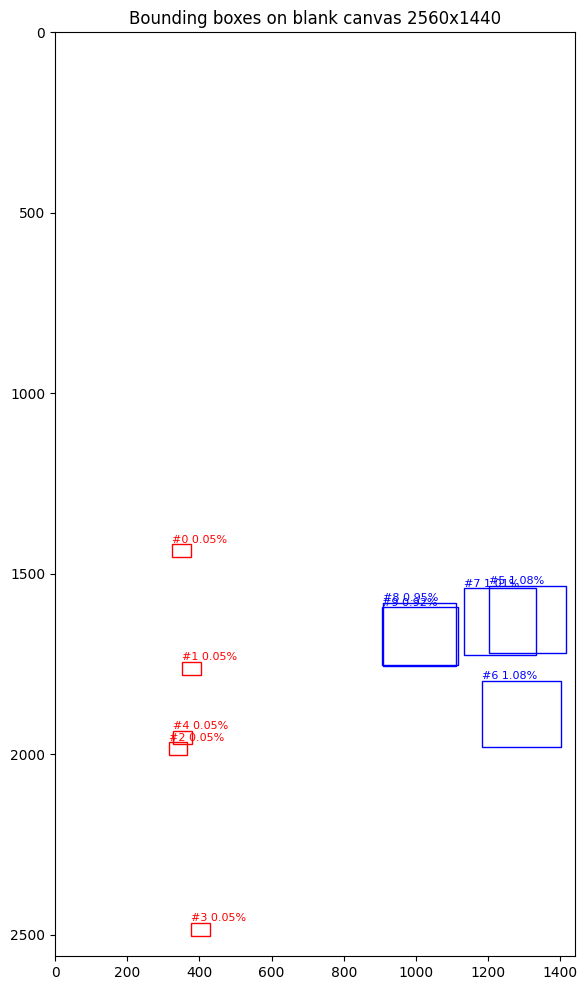

face_left_position          353
face_top_position          1743
face_right_position         405
face_bot_position          1779
bbox_area_pct          0.050781
Name: 1, dtype: object


In [47]:
canvas = np.ones((IMAGE_W, IMAGE_H, 3), dtype=np.float32)

fig, ax = plt.subplots(figsize=(7,12))
ax.imshow(canvas)


for i in range(10):
    show_bounding_box(
        l=df_visual.iloc[i][L],
        t=df_visual.iloc[i][T],
        r=df_visual.iloc[i][R],
        b=df_visual.iloc[i][B],
        pct=df_visual.iloc[i]["bbox_area_pct"],
        axe=ax,
        text=f"#{i}",
        color="red" if i < 5 else "blue"
    )

ax.set_title(f"Bounding boxes on blank canvas {IMAGE_W}x{IMAGE_H}")
plt.show()
print(df_visual.iloc[1][[L, T, R, B, "bbox_area_pct"]])